<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



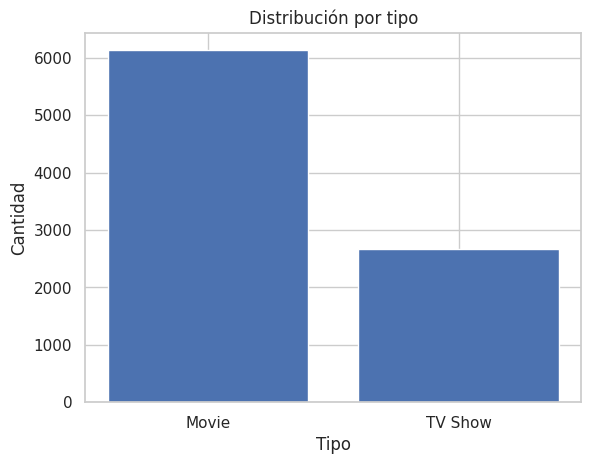

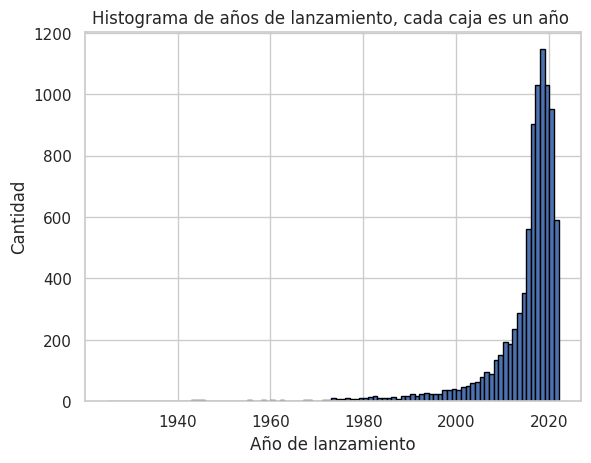

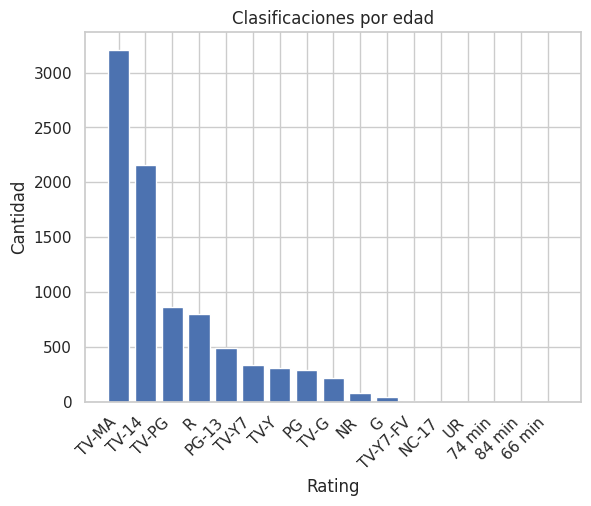

In [17]:
# FIXME




#ITEM 1---------------------------------------------------------------------------------------------------------------------------------------


x = ['Movie', 'TV Show'] #que va en x
y = [(df['type'] == 'Movie').sum(),
     (df['type'] == 'TV Show').sum()] #que va en y

plt.bar(x, y) #plot
plt.xlabel('Tipo') #texto de abajo
plt.ylabel('Cantidad') #del lado
plt.title('Distribución por tipo') #titulo
plt.show() #muestra



#se denota que en netflix hay mas del doble de peliculas que de series
#podria ser que los usuarios prefieran ver peliculas, pero tambien hay que tener en cuenta la duracion de las series en comparacion a las peliculas
#o la cantidad de temporadas que estas tengan.

#ITEM 2-----------------------------------------------------------------------------------------------------------------------------------------

años = df['release_year'].dropna().astype(int) #datos de los años en los que laznzaron las peliculas, sin los datos vacios y los convierte a enteros
intervalo = range(años.min(), años.max() + 2)  # intervalos que se usaran en el plot, tienen un +2 para ajustar bien los valores del intervalo
plt.hist(años, bins=intervalo, edgecolor='black')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad')
plt.title('Histograma de años de lanzamiento, cada caja es un año ') #es un plot, me da lata explicar esto
plt.show()

#muestra cuando se creo el contenido que esta en netflix, lo que se ve es que
#la gran mayoria del contenido en netflix es reciente, el comportamiento de grafico es explonencial

#ITEM 3-----------------------------------------------------------------------------------------------------------------------------------------

datazos = df['rating'].dropna().value_counts() #datos sin contar vacios y sumando los datinhos iguales

plt.bar(datazos.index, datazos.values)
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.title('Clasificaciones por edad') # un grafico
plt.xticks(rotation=45, ha='right') #pa q quepan los datos de x label
plt.show()

#lo que mas hay son peliculas para adultos, seguido de peliculas aptas para mayores de 14
#mas o menos te puedes dar la idea que netflix es un sitio para adolecentes para arriba




## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


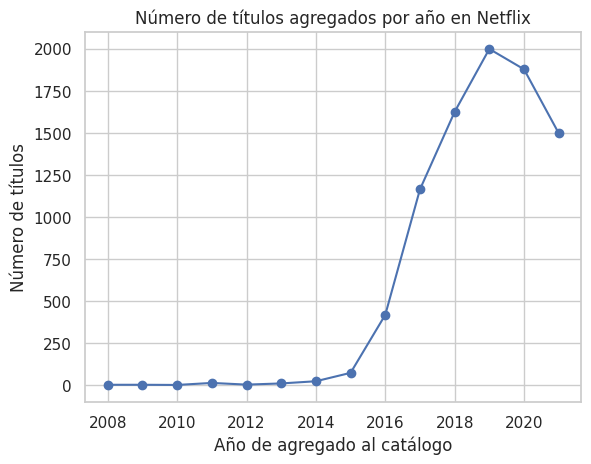

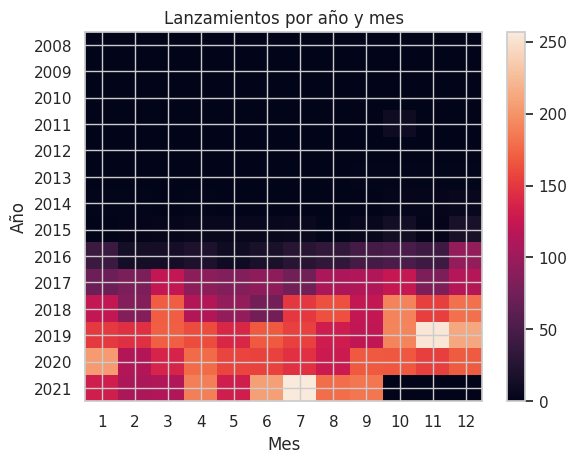

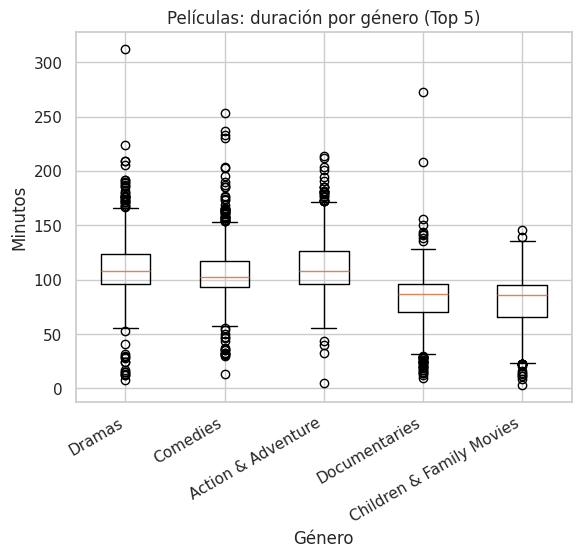

In [34]:
# FIXME
#ITEM 4-----------------------------------------------------------------------------------------------------------------------------------------
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce') #convierte todo a datetime, por si acaso

df['year_added'] = df['date_added'].dt.year #simplemente toma los años de la columna de date_added


años = df['year_added'].dropna().value_counts().sort_index() #cuenta la cantidad de ddatos repetidos, sin contar vacios y los ordena



plt.plot(años.index, años.values, marker='o')
plt.xlabel('Año de agregado al catálogo')
plt.ylabel('Número de títulos')
plt.title('Número de títulos agregados por año en Netflix')
plt.show()

# Se puede ver que el numero de titulos agregado en netflix crecio de manera exponencial hasta el 2019,
#luego hubo un declive en la cantidad añadida, esto podria ser resultado que ha comienzo de pandemia
#surgieron muchas mas plataformas de streaming de series
#ITEM 5-----------------------------------------------------------------------------------------------------------------------------------------


df['moth_added'] = df['date_added'].dt.month # polilla?

tab = pd.crosstab(df['date_added'].dt.year, df['date_added'].dt.month) #producto entre los años y las polillas (hay que se consistente)

plt.imshow(tab, aspect='auto') # el aspecto esta en auto, no me gusto como se ve con blues
plt.colorbar() # colores
plt.xticks(range(tab.shape[1]), tab.columns.astype(int))      # label de meses, estan en valores enteros
plt.yticks(range(tab.shape[0]), tab.index.astype(int))  # los mismo q arriba
plt.xlabel('Mes') # si, es un grafico con cosas de grafico
plt.ylabel('Año')
plt.title('Lanzamientos por año y mes')
plt.show()

# a simple vista se podria decir que salen mas contenido en noviembre y diciembre, y en febrero no ponen muchas cosas en netflix.

#ITEM 6-----------------------------------------------------------------------------------------------------------------------------------------
m = df[df['type'] == 'Movie'].copy() # m de movies
m['min']   = pd.to_numeric(m['duration'].str.extract(r'(\d+)')[0], errors='coerce') # te toma la duracao de los datinho
m['genre'] = m['listed_in'].str.split(',').str[0].str.strip() #los generos, se uso a conveniecia la ","para separar


top_m = m['genre'].value_counts().index[:5] # top 5 de las que quieres
data_m = [m.loc[m['genre']==g, 'min'].dropna().values for g in top_m] #seh, esta iterando dentro, hay formas mas faciles pero iterar adentro es chistoso

plt.boxplot(data_m)
plt.xticks(range(1, len(top_m)+1), top_m, rotation=30, ha='right')
plt.xlabel('Género'); plt.ylabel('Minutos')
plt.title('Películas: duración por género (Top 5)')
plt.show()


#se podria decir que los dramas y las peliculas de aventura y accion duran mas,
# los documentales y peliculas para niños duran menos en promedio



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



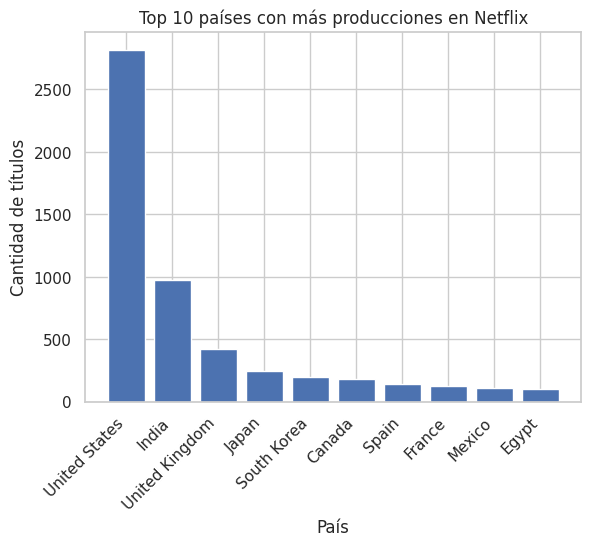

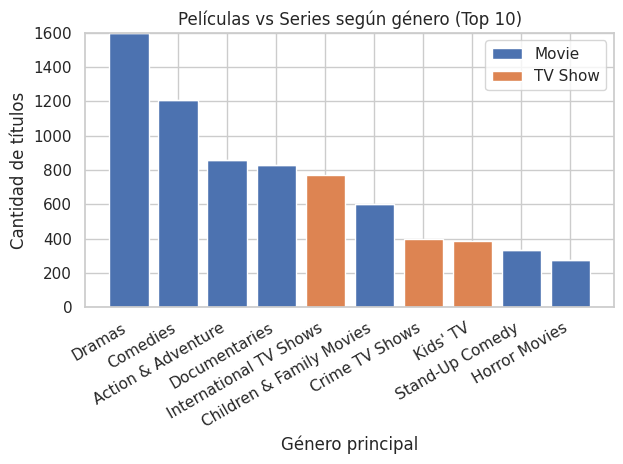

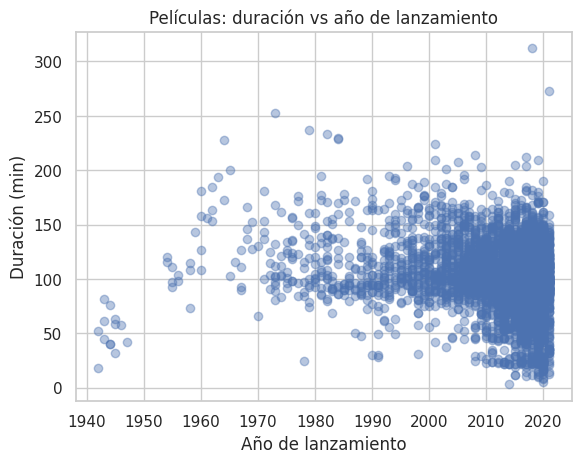

In [40]:
# FIXME

paises = df['country'].dropna().value_counts().head(10) #efectivamente paises

# Gráfico de barras
plt.bar(paises.index, paises.values)
plt.xlabel('País')
plt.ylabel('Cantidad de títulos')
plt.title('Top 10 países con más producciones en Netflix')#cosas de grafico
plt.xticks(rotation=45, ha='right') #par q quepan
plt.show()

#domina EEUU seguido de India, lo cual tiene sentido pues Netflix es gringa y
# Hollywood es uno de los mayores productores de series/peliculas, luego viene india
#que es el mayor productor de peliculas del mundo, con ello se podria afirmar que tiene sentido los datos.

################################################################################



g = df['listed_in'].dropna().str.split(',').str[0].str.strip() #datos duros


tab = pd.crosstab(g, df.loc[g.index, 'type']).fillna(0) #matriz que se ploteara


top = tab.sum(axis=1).nlargest(10).index
tab = tab.loc[top]

# Asegurar columnas (por si falta alguna)
for col in ['Movie','TV Show']:
    if col not in tab.columns: tab[col] = 0

# Datos, pero refinados
x = range(len(tab))
movies = tab['Movie'].values
shows  = tab['TV Show'].values

# Grafico, con todas sus restricciones
plt.bar(x, movies, label='Movie')
plt.bar(x, shows, bottom=movies, label='TV Show')
plt.xticks(x, tab.index, rotation=30, ha='right')
plt.xlabel('Género principal'); plt.ylabel('Cantidad de títulos')
plt.title('Películas vs Series según género (Top 10)')
plt.legend()
plt.tight_layout()
plt.show()


#se podria decir que el gneero mas consumido en series son peliculas internacionales
#(es decir, la gente ve series e otro paises no gringos), mientras lo que mas se ve en peliculas es
#drama





###########################################################################################




m['year'] = pd.to_numeric(m['release_year'], errors='coerce')
yeah = m.dropna(subset=['year','min']) #la cosa que se va a plotear, nmbre cualquiera, ya no me interesa

# Scatter año vs minutos
plt.scatter(yeah['year'], yeah['min'], alpha=0.4) #la cosa de año fue def antes
plt.xlabel('Año de lanzamiento')
plt.ylabel('Duración (min)')
plt.title('Películas: duración vs año de lanzamiento')
plt.show()


#si han cambiado, antes de los 50' las peliculas duraban menos de 100 mins en promedio
#despues de eso la cantidad de estandar se volvio 100 mins, hasta que a partir del
#2010 se emepzo a producir grandes cantidades de peliculas entre 150 y 0 mins (la duracion varia muchisimo y hay mucha cantidad).


## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME